In [14]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
batch_size = 16
img_height = 224
img_width = 224
epochs = 20
image_shape = (img_height, img_width, 3)
train_path = r"D:\DA\dataset\aug_waste_dataset_balance\taphuanluyen"
test_path = r"D:\DA\dataset\aug_waste_dataset_balance\tapkiemthu"

In [16]:
train_datagen = ImageDataGenerator(rescale=1/255,validation_split = 0.2)

In [17]:
train_data = train_datagen.flow_from_directory(
        train_path,
        target_size=image_shape[:2],
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical',
        subset='training',
        shuffle=True)

val_data = train_datagen.flow_from_directory(
        train_path,
        target_size=image_shape[:2],
        color_mode='rgb',
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False) 

Found 17959 images belonging to 14 classes.
Found 4483 images belonging to 14 classes.


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [19]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(14))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │      18,875,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 14)                  │          14,350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 14)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,130,574 (72.98 MB)

 Trainable params: 19,130,574 (72.98 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [22]:
train_data.class_indices

{'batlua': 0,
 'book': 1,
 'cans': 2,
 'cardboard': 3,
 'daulocthuocla': 4,
 'glass trash': 5,
 'khautrang': 6,
 'milk_carton': 7,
 'nylon': 8,
 'paper': 9,
 'pen': 10,
 'pin': 11,
 'plastic_bottle': 12,
 'thietbidientu': 13}

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
history = model.fit(train_data,epochs=epochs,
                              validation_data=val_data,
                             callbacks=[early_stop])

Epoch 1/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 454s 403ms/step - accuracy: 0.2086 - loss: 0.2552 - val_accuracy: 0.3991 - val_loss: 0.1960
Epoch 2/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 475s 423ms/step - accuracy: 0.4109 - loss: 0.1927 - val_accuracy: 0.4691 - val_loss: 0.1726
Epoch 3/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 451s 401ms/step - accuracy: 0.5042 - loss: 0.1680 - val_accuracy: 0.5331 - val_loss: 0.1562
Epoch 4/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 418s 372ms/step - accuracy: 0.5903 - loss: 0.1451 - val_accuracy: 0.5809 - val_loss: 0.1448
Epoch 5/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 432s 385ms/step - accuracy: 0.6602 - loss: 0.1229 - val_accuracy: 0.6232 - val_loss: 0.1330
Epoch 6/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 436s 388ms/step - accuracy: 0.7342 - loss: 0.1025 - val_accuracy: 0.6643 - val_loss: 0.1231
Epoch 7/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 436s 388ms/step - accuracy: 0.8118 - loss: 0.0818 - val_accuracy: 0.6989 - val_loss: 0.1167
Epoch 8/20
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 434s 387ms/step - ac

In [26]:
model.save('trash_classification_1.keras')

In [27]:
losses = pd.DataFrame(model.history.history)

<Axes: >

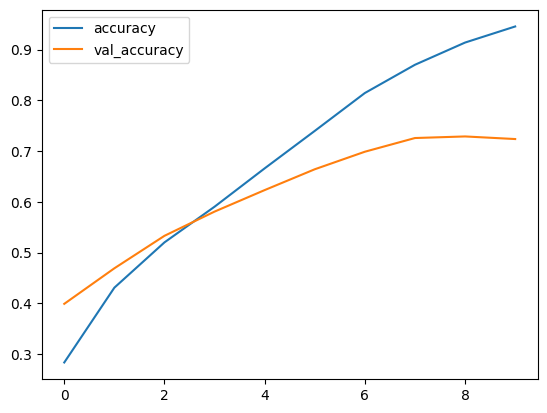

In [28]:
losses[['accuracy', 'val_accuracy']].plot()

<Axes: >

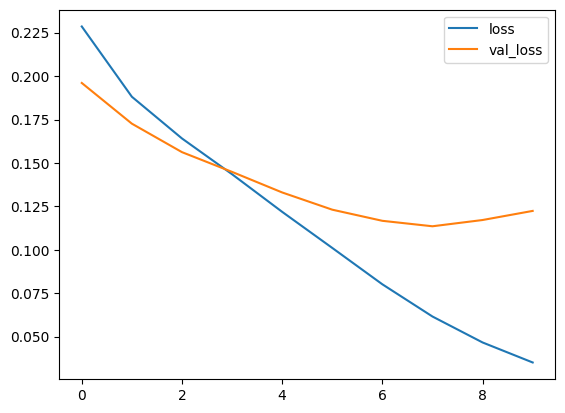

In [29]:
losses[['loss','val_loss']].plot()

In [30]:
model.metrics_names

['loss', 'compile_metrics']

In [31]:
test_data = train_datagen.flow_from_directory(
        test_path,
        target_size=image_shape[:2],
        color_mode='rgb',
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False) 

Found 6006 images belonging to 14 classes.


In [32]:
model.evaluate(test_data)

376/376 ━━━━━━━━━━━━━━━━━━━━ 50s 133ms/step - accuracy: 0.4967 - loss: 0.2452


[0.2395496815443039, 0.5141525268554688]

In [35]:
pred_probabilities = model.predict(test_data)
predictions = np.argmax(pred_probabilities, axis=1)

376/376 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(test_data.classes,predictions))

              precision    recall  f1-score   support

           0       0.46      0.34      0.39       484
           1       0.35      0.46      0.40       494
           2       0.44      0.60      0.51       488
           3       0.54      0.64      0.58       484
           4       0.88      0.76      0.82       486
           5       0.36      0.35      0.35       488
           6       0.68      0.77      0.73       393
           7       0.36      0.47      0.41       206
           8       0.49      0.40      0.44       321
           9       0.46      0.34      0.39       489
          10       0.44      0.63      0.52       209
          11       0.50      0.57      0.53       484
          12       0.78      0.56      0.65       492
          13       0.51      0.37      0.43       488

    accuracy                           0.51      6006
   macro avg       0.52      0.52      0.51      6006
weighted avg       0.53      0.51      0.51      6006



In [38]:
print(confusion_matrix(test_data.classes,predictions))

[[165  43  34  21   0  55  20   3  13  24  32  31   1  42]
 [ 37 228  20  40   0  23  19  25   9  43  11  26   0  13]
 [ 15  31 291   7   0  24   2  26  11  15   6  39  11  10]
 [  9  78  19 310   0  20   4   0   6   3  17   9   3   6]
 [  2  34   9  15 371  11   5   0   0  18   2   5   1  13]
 [ 26  29  52  53   9 169  29   8  10  21  15  23  27  17]
 [  1   9  17   1   5  18 304   3  10   2   0   2   4  17]
 [ 13   8  34  11   0   3   1  97  10   3   5  14   4   3]
 [ 14  30  21   5   6  12  16  11 127  14  20  21  10  14]
 [ 15  43  60  23  22  25   8  42  21 168  23  23   5  11]
 [  1  20  15   7   0   1   5   5   3   3 131  14   0   4]
 [ 12  26  45  18   3  20   7  16  22  13   5 274   8  15]
 [  4   6  28  36   0  41   9  30   7  24   9  19 274   5]
 [ 44  59  12  29   6  45  16   4  12  11  23  44   4 179]]


<Axes: >

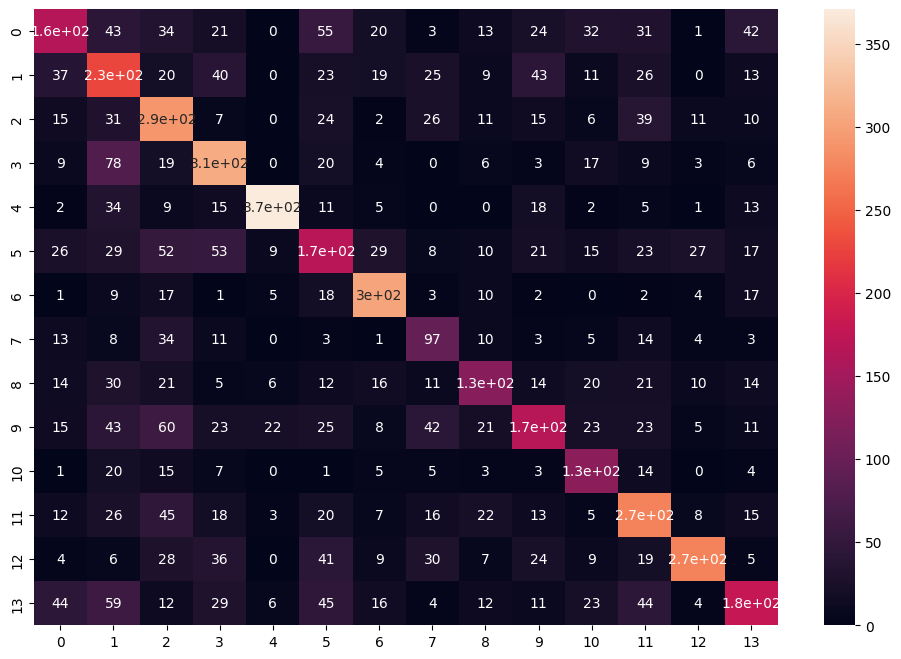

In [40]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(test_data.classes, predictions), annot=True)